In [2]:
import pandas
import numpy
import datetime

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor

from math import sqrt

from matplotlib import pyplot

In [3]:
df = pandas.read_csv("C:/Users/yilei/Downloads/AA QSR Case Study/SalesbyHour.csv")

In [4]:
df.head()
df.count()

Store_ID              125792
Fiscal_Qtr            125792
DateStringYYYYMMDD    125792
Fiscal_dayofWk        125792
Daypart               125792
HourlyWeather         125792
Hour                  125792
AvgHourlyTemp         125792
SalesRevenue          125792
dtype: int64

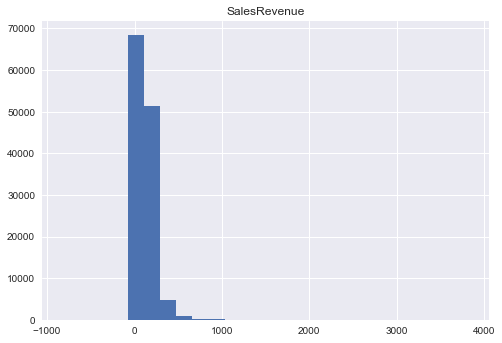

In [45]:
df.hist(column = 'SalesRevenue', bins=25)
plt.show()

In [5]:
#get values of categorical variables
df['storename'] = 'Store'
df['StoreVar'] = df['storename'] + df['Store_ID'].astype(str)

df['hourname'] = 'Hour'
df['HourVar'] = df['hourname'] + df['Hour'].astype(str)

df['dayname'] = 'Weekday'
df['dayofWkVar'] = df['dayname'] + df['Fiscal_dayofWk'].astype(str)

df['qtrname'] = 'Qtr'
df['qtrVar'] = df['qtrname'] + df['Fiscal_Qtr'].astype(str)

df['Year'] = df['DateStringYYYYMMDD'].astype(str).str.slice(0,4)

In [6]:
#create dummy variables for categorical variables
df_daypart = pandas.get_dummies(df['Daypart'])

df_weather = pandas.get_dummies(df['HourlyWeather'])

df_store = pandas.get_dummies(df['StoreVar'])

df_hr = pandas.get_dummies(df['HourVar'])

df_wk = pandas.get_dummies(df['dayofWkVar'])

df_qtr = pandas.get_dummies(df['qtrVar'])

df_yr = pandas.get_dummies(df['Year'])

df_new = pandas.concat([df, df_daypart, df_weather, df_store, df_hr, df_wk, df_qtr, df_yr], axis = 1)

df = df_new

df.head()

,Store_ID,Fiscal_Qtr,DateStringYYYYMMDD,Fiscal_dayofWk,Daypart,HourlyWeather,Hour,AvgHourlyTemp,SalesRevenue,storename,...,Weekday7,Qtr1,Qtr2,Qtr3,Qtr4,2013,2014,2015,2016,2017
0,2,3,20170714,5,Afternoon,rain,16,92.43,193.44,Store,...,0,0,0,1,0,0,0,0,0,1
1,2,3,20170714,5,Afternoon,rain,14,89.56,323.84,Store,...,0,0,0,1,0,0,0,0,0,1
2,2,3,20170714,5,Afternoon,rain,15,90.90,126.09,Store,...,0,0,0,1,0,0,0,0,0,1
3,2,3,20170714,5,Breakfast,fog,8,77.35,154.54,Store,...,0,0,0,1,0,0,0,0,0,1
4,2,3,20170714,5,Breakfast,partly-cloudy-day,9,79.06,89.60,Store,...,0,0,0,1,0,0,0,0,0,1


In [7]:
list(df)

['Store_ID',
 'Fiscal_Qtr',
 'DateStringYYYYMMDD',
 'Fiscal_dayofWk',
 'Daypart',
 'HourlyWeather',
 'Hour',
 'AvgHourlyTemp',
 'SalesRevenue',
 'storename',
 'StoreVar',
 'hourname',
 'HourVar',
 'dayname',
 'dayofWkVar',
 'qtrname',
 'qtrVar',
 'Year',
 'Afternoon',
 'Breakfast',
 'Dinner',
 'Late Night',
 'Lunch',
 'clear-day',
 'clear-night',
 'cloudy',
 'fog',
 'partly-cloudy-day',
 'partly-cloudy-night',
 'rain',
 'snow',
 'wind',
 'Store11',
 'Store16',
 'Store17',
 'Store18',
 'Store2',
 'Store20',
 'Store21',
 'Store22',
 'Store23',
 'Store31',
 'Store32',
 'Store34',
 'Store36',
 'Store38',
 'Hour0',
 'Hour10',
 'Hour11',
 'Hour12',
 'Hour13',
 'Hour14',
 'Hour15',
 'Hour16',
 'Hour17',
 'Hour18',
 'Hour19',
 'Hour20',
 'Hour21',
 'Hour22',
 'Hour23',
 'Hour4',
 'Hour5',
 'Hour6',
 'Hour7',
 'Hour8',
 'Hour9',
 'Weekday1',
 'Weekday2',
 'Weekday3',
 'Weekday4',
 'Weekday5',
 'Weekday6',
 'Weekday7',
 'Qtr1',
 'Qtr2',
 'Qtr3',
 'Qtr4',
 '2013',
 '2014',
 '2015',
 '2016',
 '201

In [8]:
#predictor variables - leave out one level for each dummy as reference category to avoid multicollinearity
df_vars_store = df[['AvgHourlyTemp', 'Afternoon', 
                    #'Breakfast',
                     'Dinner', 'Lunch', 'Late Night', 
                    #'rain', 
                    'fog', 'partly-cloudy-day', 'partly-cloudy-night',
                    'clear-day', 'clear-night', 'cloudy', 'wind', 'snow', 
                    #'Store2', 
                    'Store11', 'Store16', 'Store17', 'Store18', 'Store20',
                    'Store21', 'Store22', 'Store23', 'Store31', 'Store32', 'Store34', 'Store36', 'Store38', 
                   'Hour0', 
                    'Hour4', 'Hour5', 'Hour6', 'Hour7', 'Hour8', 'Hour9', 
                    #'Hour10',
                    'Hour11', 'Hour12', 'Hour13',
                   'Hour14', 'Hour15', 'Hour16', 'Hour17', 'Hour18', 'Hour19', 'Hour20', 'Hour21', 'Hour22', 'Hour23',
                    #'Weekday1', 
                    'Weekday2', 'Weekday3', 'Weekday4', 'Weekday5', 'Weekday6', 'Weekday7',
                   #'Qtr1', 
                    'Qtr2', 'Qtr3', 'Qtr4', 
                    '2013', 
                    '2014', '2015', 
                    #'2016', 
                    '2017']]

In [27]:
#Run linear model with all predictor variables
#Cross validated coefficient of variation with random sampling is 0.62, which is quite high
#The cross-validation result is improved with sampling, which shows that there appears to be a non-random pattern over the index (time)
X = numpy.array(df_vars_store)

X = X.reshape((len(X),X.shape[1]))

y = numpy.array(df['SalesRevenue']*1)

x_Train, x_Test, y_Train, y_Test = train_test_split(X, y, test_size = .25, random_state = 99)

####predictions
regr = linear_model.LinearRegression()

est = regr.fit(x_Train, y_Train)

y_Pred = regr.predict(x_Test)

# The coefficients
fieldList = numpy.array(list(df_vars_store)).reshape(-1,1)
coeffs = numpy.reshape(numpy.round(regr.coef_,5),(-1,1))
coeffs=numpy.concatenate((fieldList,coeffs),axis=1)
print(pandas.DataFrame(coeffs,columns=['Field','Coeff']))

print("Intercept: ", numpy.round(regr.intercept_,2))
print("Root Mean squared error: ", numpy.round(sqrt(mean_squared_error(y_Test, y_Pred)),2))
print('R Squared: ', numpy.round(r2_score(y_Test, y_Pred),2))

scores = cross_val_score(regr, X, y.astype('int'), cv=5, scoring='neg_mean_squared_error')

s = numpy.vectorize(sqrt)

print('Cross-validated RMSE: ', numpy.round(sqrt(abs(scores.mean())),2))
print('Cross-validated Coefficients of Variation: ', numpy.round(numpy.divide(s(abs(scores)), numpy.mean(y_Test)),2))
print('Cross-validated Total Coefficient of Variation: ', numpy.round(sqrt(abs(scores.mean()))/numpy.mean(y_Test),2))

scores = cross_val_score(regr, X, y.astype('int'), cv=KFold(5, shuffle=True), scoring='neg_mean_squared_error')

print('Cross-validated RMSE with shuffling: ', numpy.round(sqrt(abs(scores.mean())),2))
print('Cross-validated Total Coefficient of Variation with shuffling: ', numpy.round(sqrt(abs(scores.mean()))/numpy.mean(y_Test),2))

                  Field       Coeff
0         AvgHourlyTemp     1.17664
1             Afternoon    24.91405
2                Dinner    -6.50109
3                 Lunch    77.76937
4            Late Night   -70.81371
5                   fog    -1.43901
6     partly-cloudy-day    13.66588
7   partly-cloudy-night    10.74418
8             clear-day     15.8283
9           clear-night    18.08404
10               cloudy     4.13981
11                 wind     9.93678
12                 snow     -9.8622
13              Store11   -39.57378
14              Store16   -34.59038
15              Store17    56.42197
16              Store18   -16.34066
17              Store20    20.67618
18              Store21   -19.66654
19              Store22   -58.32132
20              Store23   -71.03044
21              Store31    19.46962
22              Store32   -62.67001
23              Store34   -55.07141
24              Store36     -20.386
25              Store38   -15.72877
26                Hour0   -2

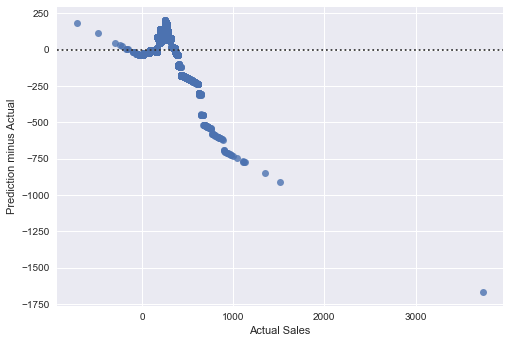

In [37]:
prediction=regr.predict(numpy.sort(x_Test, axis=0))

import seaborn as sns

ax = sns.residplot(numpy.sort(y_Test, axis = 0),prediction)

ax.set(xlabel='Actual Sales', ylabel='Prediction minus Actual')

import matplotlib.pyplot as plt

plt.show()

In [38]:
#Run polynomial model with all predictor variables

X = numpy.array(df_vars_store)

X = X.reshape((len(X),X.shape[1]))

y = numpy.array(df['SalesRevenue']*1)

x_Train, x_Test, y_Train, y_Test = train_test_split(X, y, test_size = .25, random_state = 99)

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
x_trainpoly = poly.fit_transform(x_Train)
x_Testpoly = poly.fit_transform(x_Test)

####predictions
regr = linear_model.LinearRegression()

est = regr.fit(x_trainpoly, y_Train)

y_Pred = regr.predict(x_Testpoly)

# The coefficients
#fieldList = numpy.array(list(df_vars_store)).reshape(-1,1)
#coeffs = numpy.reshape(numpy.round(regr.coef_,5),(-1,1))
#coeffs=numpy.concatenate((fieldList,coeffs),axis=1)
#print(pandas.DataFrame(coeffs,columns=['Field','Coeff']))

print("Intercept: ", numpy.round(regr.intercept_,2))
print("Root Mean squared error: ", numpy.round(sqrt(mean_squared_error(y_Test, y_Pred)),2))
print('R Squared: ', numpy.round(r2_score(y_Test, y_Pred),2))

scores = cross_val_score(regr, X, y.astype('int'), cv=5, scoring='neg_mean_squared_error')

s = numpy.vectorize(sqrt)

print('Cross-validated RMSE: ', numpy.round(sqrt(abs(scores.mean())),2))
print('Cross-validated Coefficients of Variation: ', numpy.round(numpy.divide(s(abs(scores)), numpy.mean(y_Test)),2))
print('Cross-validated Total Coefficient of Variation: ', numpy.round(sqrt(abs(scores.mean()))/numpy.mean(y_Test),2))

scores = cross_val_score(regr, X, y.astype('int'), cv=KFold(5, shuffle=True), scoring='neg_mean_squared_error')

print('Cross-validated RMSE with shuffling: ', numpy.round(sqrt(abs(scores.mean())),2))
print('Cross-validated Total Coefficient of Variation with shuffling: ', numpy.round(sqrt(abs(scores.mean()))/numpy.mean(y_Test),2))

Intercept:  -164258.44
Root Mean squared error:  843122.62
R Squared:  -74414903.22
Cross-validated RMSE:  77.21
Cross-validated Coefficients of Variation:  [ 0.74  0.55  0.69  0.64  0.64]
Cross-validated Total Coefficient of Variation:  0.65
Cross-validated RMSE with shuffling:  72.52
Cross-validated Total Coefficient of Variation with shuffling:  0.62


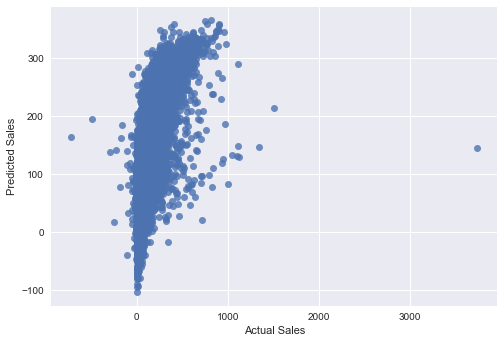

In [35]:
prediction=regr.predict(x_Test)

import seaborn as sns

ax = sns.regplot(y_Test,prediction, fit_reg = False)

ax.set(xlabel='Actual Sales', ylabel='Predicted Sales')

import matplotlib.pyplot as plt

plt.show()

In [36]:
max(prediction)

364.38080297350564

In [9]:
#try linear regression with SGD
#It looks like results are comparable to standard linear model, so we'll go with standard linear model
X = numpy.array(df_vars_store)

X = X.reshape((len(X),X.shape[1]))

y = numpy.array(df['SalesRevenue']*1)

x_Train, x_Test, y_Train, y_Test = train_test_split(X, y, test_size = .25, random_state = 99)

#scale data
scaler = StandardScaler()
scaler.fit(x_Train)  
X_train_scale = scaler.transform(x_Train)
# apply same transformation to test data
X_test_scale = scaler.transform(x_Test) 

y_Train=y_Train.astype('int')

#set parameters to ensure convergence
clf = SGDRegressor(penalty='l2', alpha=0.2, n_iter=2)

clf.fit(X_train_scale, y_Train)

y_Pred = clf.predict(X_test_scale)

print("Root Mean squared error: ", numpy.round(sqrt(mean_squared_error(y_Test, y_Pred)),2))
print('R Squared: ', numpy.round(r2_score(y_Test, y_Pred),2))
print('Coefficient of variation: ', numpy.round(sqrt(mean_squared_error(y_Test, y_Pred))/numpy.mean(y_Test),2))

Root Mean squared error:  72.45
R Squared:  0.45
Coefficient of variation:  0.61


C:\Users\yilei\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:73: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


In [10]:
#remove outliers to try to improve model fit
#remove obs outside of 3 SDs from the mean

dfTrim = df[numpy.abs(df['SalesRevenue']-df['SalesRevenue'].mean()) <= (3*df['SalesRevenue'].std())]
dfTrim.count()

#predictor variables
df_vars_store_trim = dfTrim[['AvgHourlyTemp', 'Afternoon', 
                    #'Breakfast',
                     'Dinner', 'Lunch', 'Late Night', 
                    #'rain', 
                    'fog', 'partly-cloudy-day', 'partly-cloudy-night',
                    'clear-day', 'clear-night', 'cloudy', 'wind', 'snow', 
                    #'Store2', 
                    'Store11', 'Store16', 'Store17', 'Store18', 'Store20',
                    'Store21', 'Store22', 'Store23', 'Store31', 'Store32', 'Store34', 'Store36', 'Store38', 
                   'Hour0', 
                    'Hour4', 'Hour5', 'Hour6', 'Hour7', 'Hour8', 'Hour9', 
                    #'Hour10',
                    'Hour11', 'Hour12', 'Hour13',
                   'Hour14', 'Hour15', 'Hour16', 'Hour17', 'Hour18', 'Hour19', 'Hour20', 'Hour21', 'Hour22', 'Hour23',
                    #'Weekday1', 
                    'Weekday2', 'Weekday3', 'Weekday4', 'Weekday5', 'Weekday6', 'Weekday7',
                   #'Qtr1', 
                    'Qtr2', 'Qtr3', 'Qtr4', 
                    '2013', 
                    '2014', '2015', 
                    #'2016', 
                    '2017']]

In [11]:
#run linear model on trimmed data
#coefficient of variation is improved to 0.47 and R Squared is higher
X = numpy.array(df_vars_store_trim)

X = X.reshape((len(X),X.shape[1]))

y = numpy.array(dfTrim['SalesRevenue']*1)

x_Train, x_Test, y_Train, y_Test = train_test_split(X, y, test_size = .25, random_state = 99)

####predictions
regr = linear_model.LinearRegression()

est = regr.fit(x_Train, y_Train)

y_Pred = regr.predict(x_Test)

# The coefficients
fieldList = numpy.array(list(df_vars_store)).reshape(-1,1)
coeffs = numpy.reshape(numpy.round(regr.coef_,5),(-1,1))
coeffs=numpy.concatenate((fieldList,coeffs),axis=1)
print(pandas.DataFrame(coeffs,columns=['Field','Coeff']))

print("Intercept: ", numpy.round(regr.intercept_,2))

print("Root Mean squared error: " , numpy.round(sqrt(mean_squared_error(y_Test, y_Pred)),2))
print('R Squared: ', numpy.round(r2_score(y_Test, y_Pred),2))

scores = cross_val_score(regr, X, y.astype('int'), cv=5, scoring='neg_mean_squared_error')

print('Cross-validated RMSE: ', numpy.round(sqrt(abs(scores.mean())),2))
print('Cross-validated Coefficient of Variation: ', numpy.round(sqrt(abs(scores.mean()))/numpy.mean(y_Test),2))

scores = cross_val_score(regr, X, y.astype('int'), cv=KFold(5, shuffle=True), scoring='neg_mean_squared_error')

print('Cross-validated RMSE with shuffling: ', numpy.round(sqrt(abs(scores.mean())),2))
print('Cross-validated Coefficient of Variation with shuffling: ', numpy.round(sqrt(abs(scores.mean()))/numpy.mean(y_Test),2))

                  Field       Coeff
0         AvgHourlyTemp     1.05424
1             Afternoon    27.93448
2                Dinner     -1.5693
3                 Lunch    69.12774
4            Late Night   -61.17768
5                   fog     1.91916
6     partly-cloudy-day    13.71843
7   partly-cloudy-night      9.8615
8             clear-day     16.2033
9           clear-night    16.14515
10               cloudy      7.0421
11                 wind     14.2528
12                 snow     1.92634
13              Store11   -38.35666
14              Store16   -34.16464
15              Store17    34.28789
16              Store18   -16.59765
17              Store20    10.98139
18              Store21   -18.38902
19              Store22   -56.63712
20              Store23   -62.80672
21              Store31     19.2128
22              Store32   -56.93391
23              Store34   -51.19672
24              Store36   -21.83225
25              Store38   -12.01858
26                Hour0   -2

In [12]:
#find variables that are highly correlated with target
#these should be the best predictors
df_all = df_vars_store_trim.join(dfTrim['SalesRevenue'])
corr_matrix = df_all.corr()
corr_matrix["SalesRevenue"].sort_values(ascending=False)

SalesRevenue           1.000000
Lunch                  0.434287
Hour12                 0.312215
Hour13                 0.270118
AvgHourlyTemp          0.259540
partly-cloudy-day      0.144006
2017                   0.133156
Store31                0.132359
Store17                0.132216
Hour14                 0.129299
Hour11                 0.113060
Afternoon              0.109181
Qtr2                   0.107591
clear-day              0.083686
Store20                0.076884
Hour15                 0.059510
Qtr3                   0.041751
Weekday6               0.040984
Store38                0.038255
Weekday5               0.033810
Store21                0.018605
Store36                0.012593
Weekday4               0.008950
wind                   0.007566
Weekday3              -0.005401
Hour4                 -0.005493
Hour0                 -0.006931
Weekday7              -0.008054
Hour23                -0.009052
Store32               -0.012742
snow                  -0.015534
Hour16  

In [22]:
#Can we construct a simpler model that uses some of the highly correlated variables that will enable us to predict
#sales given the info that we have for 2017-07-15?

#The date we are predicting is a Friday
datetime.date(2017, 7, 15).weekday()

df_vars_small_trim = dfTrim[['2017', 'AvgHourlyTemp', 'Hour12', 'Lunch',
                    'Store11', 'Store16', 'Store17', 'Store18', 
                             #'Store2', 
                             'Store20',
                    'Store21', 'Store22', 'Store23', 'Store31', 'Store32', 'Store34', 'Store36', 'Store38',
                    'Weekday6'
                   ,'clear-day']]

In [23]:
#run linear model with less predictors
#looks like the RMSE is almost as low as that of the full model, so we'll use this model to predict for 7-15
X = numpy.array(df_vars_small_trim)

X = X.reshape((len(X),X.shape[1]))

y = numpy.array(dfTrim['SalesRevenue']*1)

x_Train, x_Test, y_Train, y_Test = train_test_split(X, y, test_size = .25, random_state = 99)

####predictions
regr = linear_model.LinearRegression()

est = regr.fit(x_Train, y_Train)

y_Pred = regr.predict(x_Test)

# The coefficients
fieldList = numpy.array(list(df_vars_small_trim)).reshape(-1,1)
coeffs = numpy.reshape(numpy.round(regr.coef_,5),(-1,1))
coeffs=numpy.concatenate((fieldList,coeffs),axis=1)
print(pandas.DataFrame(coeffs,columns=['Field','Coeff']))

print("Intercept: ", numpy.round(regr.intercept_,2))
print("Root Mean squared error: ", numpy.round(sqrt(mean_squared_error(y_Test, y_Pred)),2))
print('R Squared: ', numpy.round(r2_score(y_Test, y_Pred),2))

scores = cross_val_score(regr, X, y.astype('int'), cv=5, scoring='neg_mean_squared_error')

print('Cross-validated RMSE: ', numpy.round(sqrt(abs(scores.mean())),2))

scores = cross_val_score(regr, X, y.astype('int'), cv=KFold(5, shuffle=True), scoring='neg_mean_squared_error')

print('Cross-validated RMSE with shuffling: ', numpy.round(sqrt(abs(scores.mean())),2))
print('Cross-validated Coefficient of Variation with shuffling: ', numpy.round(sqrt(abs(scores.mean()))/numpy.mean(y_Test),2))


            Field      Coeff
0            2017   29.71135
1   AvgHourlyTemp    1.32413
2          Hour12   38.88101
3           Lunch   69.17013
4         Store11  -36.74481
5         Store16  -36.26204
6         Store17   28.48219
7         Store18  -14.27388
8         Store20   13.87365
9         Store21   -7.37987
10        Store22  -46.58332
11        Store23  -65.80057
12        Store31   26.24783
13        Store32  -65.56209
14        Store34  -43.15808
15        Store36  -15.54305
16        Store38   -7.76942
17       Weekday6    7.21864
18      clear-day    10.5597
Intercept:  -1.59
Root Mean squared error:  59.4
R Squared:  0.4
Cross-validated RMSE:  62.01
Cross-validated RMSE with shuffling:  59.59
Cross-validated Coefficient of Variation with shuffling:  0.54


In [24]:
#set up the data for 7-15-17 for each store, given the info that we have about the time and hourly temperature
df_predict = pandas.DataFrame(
    {
        'Lunch':             [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        'Hour12':            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        'AvgHourlyTemp':     [86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86],
        'clear-day':         [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        '2017':              [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        'Weekday6':          [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        
        #'Store2':            [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], <- baseline category
        'Store11':           [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        'Store16':           [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        'Store17':           [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        'Store18':           [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        'Store20':           [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        'Store21':           [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        'Store22':           [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        'Store23':           [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        'Store31':           [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        'Store32':           [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        'Store34':           [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        'Store36':           [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        'Store38':           [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        
    }
)

#Ensure that column order is the same
df_predict = df_predict[df_vars_small_trim.columns]

In [25]:
#predict for 2017-7-15
#Looks like our predictions may be a bit low, due to the outlier removal
X = numpy.array(df_predict)

X = X.reshape((len(X),X.shape[1]))

y_Pred_2017 = regr.predict(X)

df_results = df_predict.copy()

df_results['PredictedSales'] = numpy.round(y_Pred_2017,2)
df_results['Store_ID'] = [2,11,16,17,18,20,21,22,23,31,32,34,36,38]

df_results[['Store_ID','PredictedSales']]

print('Prediction mean for 7-15-17 across all 14 stores during Hour 12: ', numpy.round(numpy.mean(y_Pred_2017),2))
dfActualSales = df[ (df['Year'] == '2017') & (df['Fiscal_Qtr'] == 3) & (df['Hour'] == 12) & (df['Weekday5'] == 1)]
print('Mean actual sales across all 14 stores for Q3 2017 on Fridays during Hour 12 : ', 
      numpy.round(numpy.mean(dfActualSales['SalesRevenue']),2))

dfActualSales = dfTrim[ (dfTrim['Year'] == '2017') & (dfTrim['Fiscal_Qtr'] == 3) & (dfTrim['Hour'] == 12) & (dfTrim['Weekday5'] == 1)]
print('Mean actual sales across all 14 stores for Q3 2017 on Fridays during Hour 12 (outliers removed): ', 
      numpy.round(numpy.mean(dfActualSales['SalesRevenue']),2))


Prediction mean for 7-15-17 across all 14 stores during Hour 12:  248.5
Mean actual sales across all 14 stores for Q3 2017 on Fridays during Hour 12 :  332.9
Mean actual sales across all 14 stores for Q3 2017 on Fridays during Hour 12 (outliers removed):  246.22


In [26]:
#Given the very different coefficients of variation by fold in our cross-validation, let's look at the sales revenue over time
df[['Year','SalesRevenue']].groupby(['Year']).mean()

,SalesRevenue
Year,
2013,48.514457
2014,84.086234
2015,115.495783
2016,122.702980
2017,137.962642


In [29]:
#Do we get better results using a model trained on only 2017 data?
dfTrim17 = dfTrim[ (dfTrim['Year'] == '2017') ]

df_vars_small_trim_17 = dfTrim17[['AvgHourlyTemp', 'Hour12', 'Lunch', '2017',
                    'Store11', 'Store16', 'Store17', 'Store18', 
                                  #'Store2', 
                                  'Store20',
                    'Store21', 'Store22', 'Store23', 'Store31', 'Store32', 'Store34', 'Store36', 'Store38',
                    'Weekday6'
                   ,'clear-day']]


#run linear model with less predictors
X = numpy.array(df_vars_small_trim_17)

X = X.reshape((len(X),X.shape[1]))

y = numpy.array(dfTrim17['SalesRevenue']*1)

x_Train, x_Test, y_Train, y_Test = train_test_split(X, y, test_size = .25, random_state = 99)

####predictions
regr = linear_model.LinearRegression()

est = regr.fit(x_Train, y_Train)

y_Pred = regr.predict(x_Test)

# The coefficients
fieldList = numpy.array(list(df_vars_small_trim_17)).reshape(-1,1)
coeffs = numpy.reshape(numpy.round(regr.coef_,5),(-1,1))
coeffs=numpy.concatenate((fieldList,coeffs),axis=1)
print(pandas.DataFrame(coeffs,columns=['Field','Coeff']))

print("Intercept: ", numpy.round(regr.intercept_,2))
print("Root Mean squared error: ", numpy.round(sqrt(mean_squared_error(y_Test, y_Pred)),2))
print('R Squared: ',  numpy.round(r2_score(y_Test, y_Pred),2))

scores = cross_val_score(regr, X, y.astype('int'), cv=5, scoring='neg_mean_squared_error')

print('Cross-validated RMSE: ', numpy.round(sqrt(abs(scores.mean())),2))

scores = cross_val_score(regr, X, y.astype('int'), cv=KFold(5, shuffle=True), scoring='neg_mean_squared_error')

print('Cross-validated RMSE with shuffling: ', numpy.round(sqrt(abs(scores.mean())),2))
print('Cross-validated Coefficient of Variation with shuffling: ', numpy.round(sqrt(abs(scores.mean()))/numpy.mean(y_Test),2))

            Field      Coeff
0   AvgHourlyTemp    1.60772
1          Hour12   41.85629
2           Lunch   80.91486
3            2017        0.0
4         Store11  -61.58009
5         Store16  -59.51316
6         Store17   37.29124
7         Store18   -40.4018
8         Store20      2.952
9         Store21  -26.05663
10        Store22   -53.1757
11        Store23  -78.77663
12        Store31   35.67372
13        Store32  -78.35101
14        Store34   -61.7893
15        Store36  -25.51525
16        Store38  -17.93492
17       Weekday6    8.40995
18      clear-day   19.71783
Intercept:  12.74
Root Mean squared error:  60.24
R Squared:  0.46
Cross-validated RMSE:  62.31
Cross-validated RMSE with shuffling:  60.88
Cross-validated Coefficient of Variation with shuffling:  0.48


In [30]:
#predict for 2017-7-15, we are closer to actual averages after using 2017 only model
#But still lower than comparable actual numbers

#Ensure that column order is the same
df_predict = df_predict[df_vars_small_trim_17.columns]

X = numpy.array(df_predict)

X = X.reshape((len(X),X.shape[1]))

y_Pred_2017 = regr.predict(X)

df_Results = df_predict.copy()

df_Results['PredictedSales'] = numpy.round(y_Pred_2017,2)
df_Results['Store_ID'] = [2,11,16,17,18,20,21,22,23,31,32,34,36,38]

print('Prediction mean for 7-15-17 across all 14 stores during Hour 12: ', numpy.round(numpy.mean(y_Pred_2017),2))
dfActualSales = df[ (df['Year'] == '2017') & (df['Fiscal_Qtr'] == 3) & (df['Hour'] == 12) & (df['Weekday5'] == 1)]
print('Mean actual sales across all 14 stores for Q3 2017 on Saturdays during Hour 12 : ', 
      numpy.round(numpy.mean(dfActualSales['SalesRevenue']),2))

Prediction mean for 7-15-17 across all 14 stores during Hour 12:  271.39
Mean actual sales across all 14 stores for Q3 2017 on Saturdays during Hour 12 :  332.9


In [31]:
#run our model again with outliers added back in and using 2017 only
df17 = df[ (df['Year'] == '2017') ]

df_vars_small17 = df17[['2017', 'AvgHourlyTemp', 'Hour12', 'Lunch',
                    'Store11', 'Store16', 'Store17', 'Store18', 
                        #'Store2', 
                        'Store20',
                    'Store21', 'Store22', 'Store23', 'Store31', 'Store32', 'Store34', 'Store36', 'Store38',
                    'Weekday6'
                   ,'clear-day']]


#run linear model with less predictors
X = numpy.array(df_vars_small17)

X = X.reshape((len(X),X.shape[1]))

y = numpy.array(df17['SalesRevenue']*1)

x_Train, x_Test, y_Train, y_Test = train_test_split(X, y, test_size = .25, random_state = 99)

####predictions
regr = linear_model.LinearRegression()

est = regr.fit(x_Train, y_Train)

y_Pred = regr.predict(x_Test)

# The coefficients
fieldList = numpy.array(list(df_vars_small17)).reshape(-1,1)
coeffs = numpy.reshape(numpy.round(regr.coef_,5),(-1,1))
coeffs=numpy.concatenate((fieldList,coeffs),axis=1)
print(pandas.DataFrame(coeffs,columns=['Field','Coeff']))

print("Intercept: ", numpy.round(regr.intercept_,2))
print("Root Mean squared error: ", numpy.round(sqrt(mean_squared_error(y_Test, y_Pred)),2))
print('R Squared: ',  numpy.round(r2_score(y_Test, y_Pred),2))

scores = cross_val_score(regr, X, y.astype('int'), cv=5, scoring='neg_mean_squared_error')

print('Cross-validated RMSE: ', numpy.round(sqrt(abs(scores.mean())),2))

scores = cross_val_score(regr, X, y.astype('int'), cv=KFold(5, shuffle=True), scoring='neg_mean_squared_error')

print('Cross-validated RMSE with shuffling: ', numpy.round(sqrt(abs(scores.mean())),2))
print('Cross-validated Coefficient of Variation with shuffling: ', numpy.round(sqrt(abs(scores.mean()))/numpy.mean(y_Test),2))

            Field      Coeff
0            2017        0.0
1   AvgHourlyTemp    1.77189
2          Hour12   72.01923
3           Lunch   90.51765
4         Store11  -64.81177
5         Store16  -62.25553
6         Store17   74.92607
7         Store18  -43.53551
8         Store20   16.74847
9         Store21  -25.15961
10        Store22  -51.50617
11        Store23  -81.61021
12        Store31   39.10766
13        Store32  -85.46819
14        Store34  -63.26162
15        Store36  -25.20756
16        Store38  -17.89974
17       Weekday6     3.6888
18      clear-day   21.34459
Intercept:  -0.09
Root Mean squared error:  82.31
R Squared:  0.41
Cross-validated RMSE:  84.56
Cross-validated RMSE with shuffling:  83.34
Cross-validated Coefficient of Variation with shuffling:  0.61


In [32]:
#predict for 2017-7-15 - we are closer now to the mean of actual sales around our date and time of day after adding outliers back
#and only using 2017 data to train the model

#Ensure that column order is the same
df_predict = df_predict[df_vars_small17.columns]

X = numpy.array(df_predict)

X = X.reshape((len(X),X.shape[1]))

y_Pred_2017 = regr.predict(X)

df_Results = df_predict.copy()

df_Results['PredictedSales'] = numpy.round(y_Pred_2017,2)
df_Results['Store_ID'] = [2,11,16,17,18,20,21,22,23,31,32,34,36,38]

print('Prediction mean for 7-15-17 across all 14 stores during Hour 12: ', numpy.round(numpy.mean(y_Pred_2017),2))
dfActualSales = df[ (df['Year'] == '2017') & (df['Fiscal_Qtr'] == 3) & (df['Hour'] == 12) & (df['Weekday5'] == 1)]
print('Mean actual sales across all 14 stores for Q3 2017 on Saturdays during Hour 12 : ', 
      numpy.round(numpy.mean(dfActualSales['SalesRevenue']),2))


Prediction mean for 7-15-17 across all 14 stores during Hour 12:  312.01
Mean actual sales across all 14 stores for Q3 2017 on Saturdays during Hour 12 :  332.9


In [33]:
#Therefore, our final recommendation is to use a 2017 only model to predict sales later in the year
df_Results[['Store_ID','PredictedSales']]

,Store_ID,PredictedSales
0,2,339.86
1,11,275.05
2,16,277.60
3,17,414.79
4,18,296.32
5,20,356.61
6,21,314.70
7,22,288.35
8,23,258.25
9,31,378.97
